# 기본세팅

In [2]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

# 희귀질환 전략과제별/연도별 소요예산 dataset

In [11]:
list = {
    '전략과제': ['희귀질환 진료 접근성 제고', '희귀질환 진단 지원 강화', '희귀의약품 급여 접근성 강화', '희귀질환 치료제 연구확대', '환자의 삶의 질 개선을 위한 지원 강화', '국가관리대상 희귀질환 지정체계 고도화', '희귀질환 등록통계 및 실태 조사 체계 강화', '통합 데이터베이스 구축', '전문가 양성 및 운영체계 개선', '희귀질환 관리 및 협력체계 강화', '합계'],
    '2022' : [16.8, 5.7, 0.0, 54.0, 368.0, 2.0, 1.3, 0.0, 0.5, 0.1, 448.4],
    '2023' : [22.4, 7.2, 0.0, 65.0, 392.1, 3.0, 1.7, 5.5, 0.6, 1.3, 508.8],
    '2024' : [36.0, 9.5, 1.0, 74.5, 392.1, 3.0, 38.0, 0.0, 6.4, 1.3, 561.8],
    '2025' : [42.0, 10.0, 3.0, 73.5, 392.1, 3.0, 8.0, 64.1, 6.8, 1.3, 603.8],
    '2026' : [53.5, 12.0, 3.0, 81.5, 392.1, 3.0, 18.0, 49.5, 9.2, 1.3, 623.1],
    '계(단위: 억원)' : [170.7, 44.4, 7.0, 348.5, 1936.4, 14.0, 67.0, 119.1, 23.5, 5.3, 2745.9]
}

# 데이터프레임 생성
df_budget_list = pd.DataFrame(list)

# 2022부터 2026까지의 년도 열과 '계' 열 추가
years = ['2022', '2023', '2024', '2025', '2026']
for year in years:
    df_budget_list[year] = list[year]

df_budget_list['계(단위: 억원)'] = list['계(단위: 억원)']

# 데이터프레임 출력
df_budget_list

,전략과제,2022,2023,2024,2025,2026,계(단위: 억원)
0,희귀질환 진료 접근성 제고,16.8,22.4,36.0,42.0,53.5,170.7
1,희귀질환 진단 지원 강화,5.7,7.2,9.5,10.0,12.0,44.4
2,희귀의약품 급여 접근성 강화,0.0,0.0,1.0,3.0,3.0,7.0
3,희귀질환 치료제 연구확대,54.0,65.0,74.5,73.5,81.5,348.5
4,환자의 삶의 질 개선을 위한 지원 강화,368.0,392.1,392.1,392.1,392.1,1936.4
5,국가관리대상 희귀질환 지정체계 고도화,2.0,3.0,3.0,3.0,3.0,14.0
6,희귀질환 등록통계 및 실태 조사 체계 강화,1.3,1.7,38.0,8.0,18.0,67.0
7,통합 데이터베이스 구축,0.0,5.5,0.0,64.1,49.5,119.1
8,전문가 양성 및 운영체계 개선,0.5,0.6,6.4,6.8,9.2,23.5
9,희귀질환 관리 및 협력체계 강화,0.1,1.3,1.3,1.3,1.3,5.3


In [47]:
# '합계' 행 삭제
df_budget_list_list = df_budget_list.drop(df_budget_list.index[10])
df_budget_list_list

,전략과제,2022,2023,2024,2025,2026,계(단위: 억원)
0,희귀질환 진료 접근성 제고,16.8,22.4,36.0,42.0,53.5,170.7
1,희귀질환 진단 지원 강화,5.7,7.2,9.5,10.0,12.0,44.4
2,희귀의약품 급여 접근성 강화,0.0,0.0,1.0,3.0,3.0,7.0
3,희귀질환 치료제 연구확대,54.0,65.0,74.5,73.5,81.5,348.5
4,환자의 삶의 질 개선을 위한 지원 강화,368.0,392.1,392.1,392.1,392.1,1936.4
5,국가관리대상 희귀질환 지정체계 고도화,2.0,3.0,3.0,3.0,3.0,14.0
6,희귀질환 등록통계 및 실태 조사 체계 강화,1.3,1.7,38.0,8.0,18.0,67.0
7,통합 데이터베이스 구축,0.0,5.5,0.0,64.1,49.5,119.1
8,전문가 양성 및 운영체계 개선,0.5,0.6,6.4,6.8,9.2,23.5
9,희귀질환 관리 및 협력체계 강화,0.1,1.3,1.3,1.3,1.3,5.3


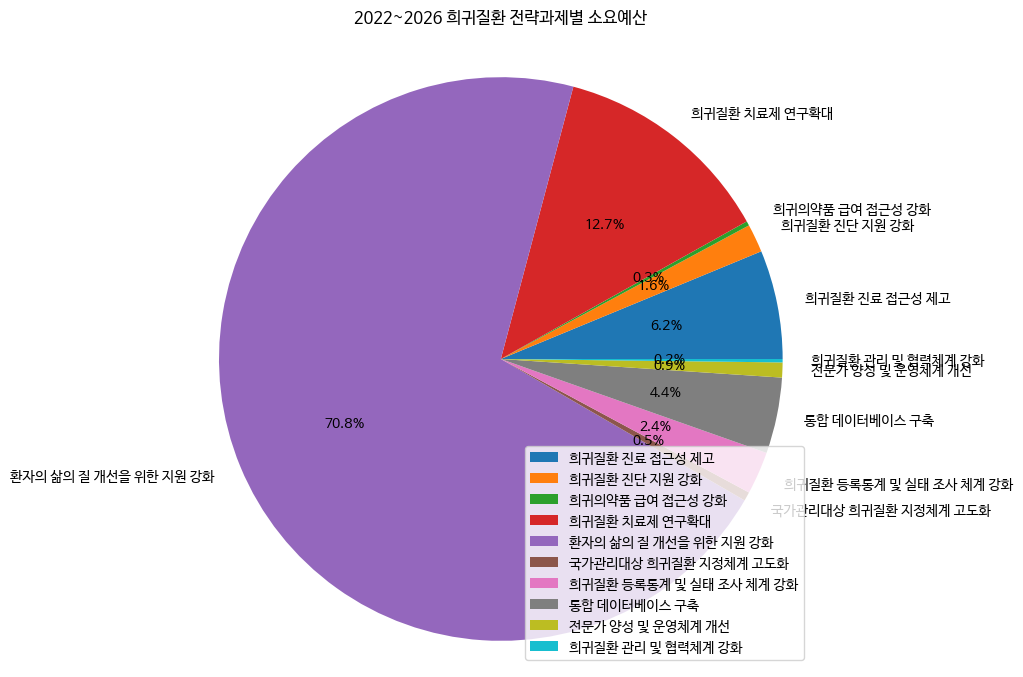

In [53]:
# 파이차트 그리기
plt.figure(figsize=(8, 8))
pie = plt.pie(df_budget_list_list['계(단위: 억원)'], labels=df_budget_list_list['전략과제'], autopct='%1.1f%%')
plt.legend(pie[0], df_budget_list_list['전략과제'], loc="lower right", bbox_to_anchor=(1.0, 0.0))
plt.axis('equal')
plt.title('2022~2026 희귀질환 전략과제별 소요예산\n')
plt.show()

#### 10가지 전략과제 중 '환자의 삶의 질 개선을 위한 지원 강화'에 투입하는 예산이 가장 높음.

## '환자의 삶의 질 개선을 위한 지원 강화' 전략에 대하여 세부과제 별 예산 dataset

In [13]:
detail_list = {
    '세부과제': ['삶의 질 실태조사 체계화', '환자 및 가족 지지체계 강화', '희귀질환 인식 제고', '소계'],
    '2022' : [0.0, 368.0, 0.0, 368.0],
    '2023' : [4.7, 386.4, 1.0, 392.1],
    '2024' : [4.7, 386.4, 1.0, 392.1],
    '2025' : [4.7, 386.4, 1.0, 392.1],
    '2026' : [4.7, 386.4, 1.0, 392.1],
    '계(단위: 억원)' : [18.8, 1913.6, 4.0, 1936.4]
}

# 데이터프레임 생성
df_budget_detail_list = pd.DataFrame(detail_list)

# 2022부터 2026까지의 년도 열과 '계' 열 추가
years = ['2022', '2023', '2024', '2025', '2026']
for year in years:
    df_budget_detail_list[year] = detail_list[year]

df_budget_detail_list['계(단위: 억원)'] = detail_list['계(단위: 억원)']

df_budget_detail_list

,세부과제,2022,2023,2024,2025,2026,계(단위: 억원)
0,삶의 질 실태조사 체계화,0.0,4.7,4.7,4.7,4.7,18.8
1,환자 및 가족 지지체계 강화,368.0,386.4,386.4,386.4,386.4,1913.6
2,희귀질환 인식 제고,0.0,1.0,1.0,1.0,1.0,4.0
3,소계,368.0,392.1,392.1,392.1,392.1,1936.4


In [50]:
# '소계' 행 삭제
df_budget_detail_list_list = df_budget_detail_list.drop(df_budget_detail_list.index[3])
df_budget_detail_list_list

,세부과제,2022,2023,2024,2025,2026,계(단위: 억원)
0,삶의 질 실태조사 체계화,0.0,4.7,4.7,4.7,4.7,18.8
1,환자 및 가족 지지체계 강화,368.0,386.4,386.4,386.4,386.4,1913.6
2,희귀질환 인식 제고,0.0,1.0,1.0,1.0,1.0,4.0


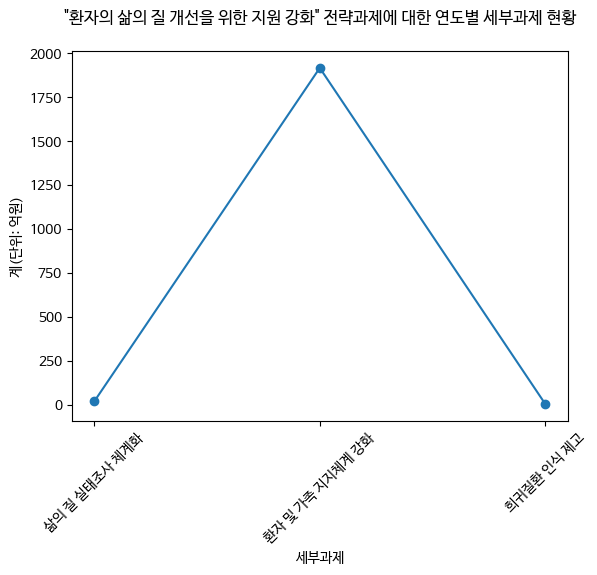

In [52]:
# 선그래프 그리기
plt.plot(df_budget_detail_list_list['세부과제'], df_budget_detail_list_list['계(단위: 억원)'], marker='o', linestyle='-')
plt.title('"환자의 삶의 질 개선을 위한 지원 강화" 전략과제에 대한 연도별 세부과제 현황\n')
plt.xlabel('세부과제')
plt.ylabel('계(단위: 억원)')
plt.xticks(rotation=45)
plt.show()

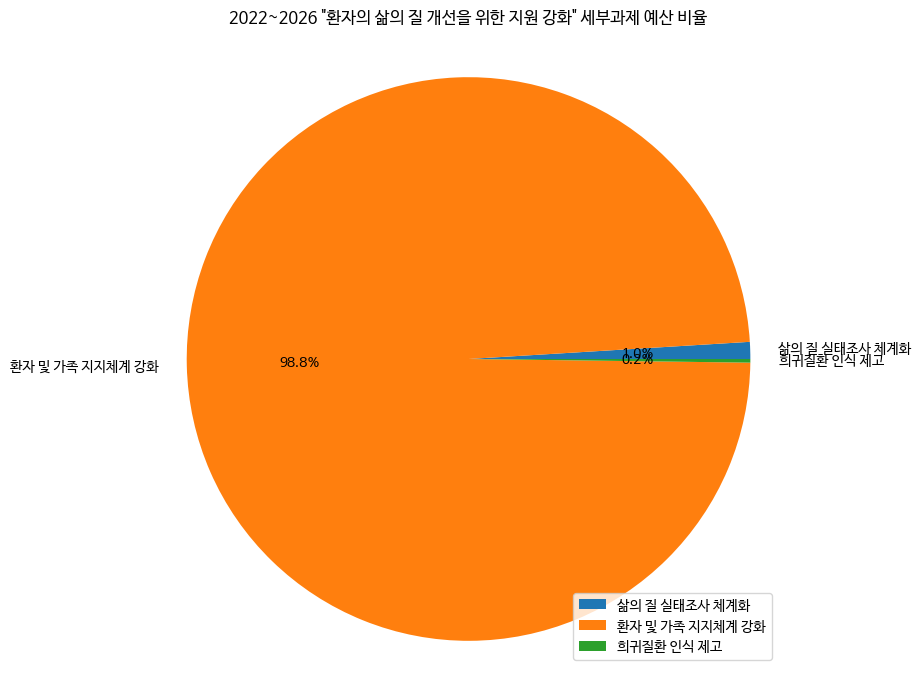

In [56]:
# 파이차트 그리기
plt.figure(figsize=(8, 8))
pie = plt.pie(df_budget_detail_list_list['계(단위: 억원)'], labels=df_budget_detail_list_list['세부과제'], autopct='%1.1f%%')
plt.legend(pie[0], df_budget_detail_list_list['세부과제'], loc="lower right", bbox_to_anchor=(1.0, 0.0))
plt.axis('equal')
plt.title('2022~2026 "환자의 삶의 질 개선을 위한 지원 강화" 세부과제 예산 비율\n')
plt.show()

In [60]:
# '세부과제'와 '2024' 열 추출
df_subset = df_budget_detail_list_list[['세부과제', '2024']]
df_subset

,세부과제,2024
0,삶의 질 실태조사 체계화,4.7
1,환자 및 가족 지지체계 강화,386.4
2,희귀질환 인식 제고,1.0


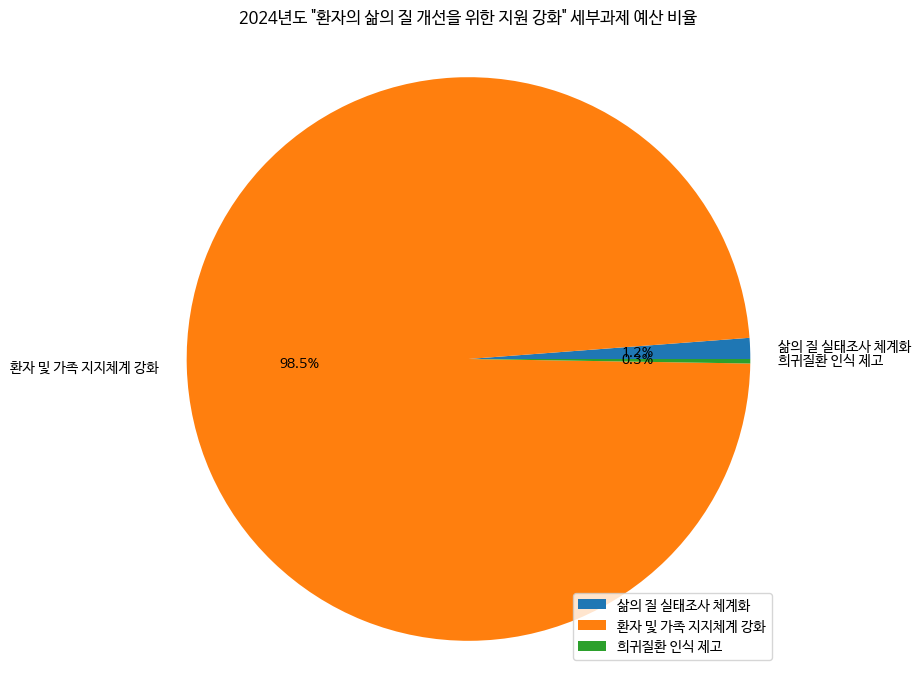

In [61]:
# 2024년도 '환자의 삶의 질 개선을 위한 지원 강화'에 대한 세부과제 파이차트
plt.figure(figsize=(8, 8))
pie = plt.pie(df_subset['2024'], labels=df_subset['세부과제'], autopct='%1.1f%%')
plt.legend(pie[0], df_subset['세부과제'], loc="lower right", bbox_to_anchor=(1.0, 0.0))
plt.axis('equal')
plt.title('2024년도 "환자의 삶의 질 개선을 위한 지원 강화" 세부과제 예산 비율\n')
plt.show()

### 
+ '환자 및 가족 지지체계 강화'에 할당된 예산이 압도적으로 높음.
+ '환자 및 가족 지지체계 강화'에 할당된 예산은 전체 전략과제에 대한 세부과제 중에서도 예산이 가장 높게 할당되었음.

In [5]:
total_list = {
    '전략과제': ['희귀질환 진료 접근성 제고', '희귀질환 진료 접근성 제고', '희귀질환 진료 접근성 제고',
             '희귀질환 진단지원 강화', '희귀질환 진단지원 강화',
             '희귀의약품 급여 접근성 강화',
             '희귀질환 치료제 연구확대', '희귀질환 치료제 연구확대', '희귀질환 치료제 연구확대',
             '환자의 삶의 질 개선을 위한 지원 강화', '환자의 삶의 질 개선을 위한 지원 강화', '환자의 삶의 질 개선을 위한 지원 강화',
             '국가관리대상 희귀질환 지정체계 고도화',
             '희귀질환 등록통계·실태조사 체계 강화', '희귀질환 등록통계·실태조사 체계 강화',
             '통합 데이터베이스 구축',
             '전문가 양성·운영체계 개선', '전문가 양성·운영체계 개선',
             '희귀질환 관리·협력 체계 강화', '희귀질환 관리·협력 체계 강화', '희귀질환 관리·협력 체계 강화'
            ],
    '세부과제': ['희귀질환 전문기관 지정요건 정비', '특성화 전문기관 지정·확대', '권역별 전문기관 지정·운영',
             '유전상담 지원기반 마련', '진단지원 확대 및 고도화',
             '비급여 희귀의약품 실태조사 추진 / 급여 등재체계 개선방안 마련',
             '임상연구 확대', '협력·중개연구 강화', '연구동향 조사 및 공유·활용체계마련',
             '삶의 질 실태조사 체계화', '환자 및 가족 지지체계 강화', '희귀질환 인식 제고',
             '희귀질환 전문위원회 개편 / 희귀질환 지정체계 정비 / 희귀질환 지정 후속관리 체계화',
             '희귀질환 등록통계 고도화', '실태조사 및 레지스트리 실효성 제고',
             '환자 및 가족 대상 양방향 정보제공 / 전문가 대상 양방향 정보제공 / 희귀질환 데이터 통합관리방안 마련',
             '교육체계 정비 및 내실화', '질환 분야별 전문역량 강화',
             '희귀질환 관리 민관 협력사업 추진', '희귀질환 관리포럼 운영', '국제협력 강화'
             ],
    '2022' : [2.4, 0.0, 14.4, 1.5, 4.2, 0.0, 30.0, 24.0, 0.0, 0.0, 368.0, 0.0, 2.0, 1.0, 0.3, 0.0, 0.5, 0.0, 0.0, 0.1, 0.0],
    '2023' : [8.0, 0.0, 14.4, 3.0, 4.2, 0.0, 35.0, 28.5, 1.5, 4.7, 386.4, 1.0, 3.0, 0.9, 0.8, 5.5, 0.6, 0.0, 1.0, 0.3, 0.0],
    '2024' : [1.5, 6.5, 28.0, 3.0, 6.5, 1.0, 61.0, 12.0, 1.5, 4.7, 386.4, 1.0, 3.0, 1.0, 37.0, 0.0, 1.0, 5.4, 1.0, 0.3, 0.0],
    '2025' : [1.5, 12.5, 28.0, 3.0, 7.0, 3.0, 72.0, '(미정)', 1.5, 4.7, 386.4, 1.0, 3.0, 1.0, 7.0, 64.1, 0.5, 6.3, 1.0, 0.3, 0.0],
    '2026' : [1.5, 20.0, 32.0, 3.0, 9.0, 3.0, 80.0, '(미정)', 1.5, 4.7, 386.4, 1.0, 3.0, 1.0, 17.0, 49.5, 0.5, 8.7, 1.0, 0.3, 0.0],
    '계(단위: 억원)' : [14.9, 39.0, 116.8, 13.5, 30.9, 7.0, 278.0, 64.5, 6.0, 18.8, 1913.6, 4.0, 14.0, 4.9, 62.1, 119.1, 3.1, 20.4, 4.0, 1.3, 0.0],
}

# 데이터프레임 생성
df_total_list = pd.DataFrame(total_list)

# 2022부터 2026까지의 년도 열과 '계' 열 추가
years = ['2022', '2023', '2024', '2025', '2026']
for year in years:
    df_total_list[year] = total_list[year]

df_total_list['계(단위: 억원)'] = total_list['계(단위: 억원)']

df_total_list

,전략과제,세부과제,2022,2023,2024,2025,2026,계(단위: 억원)
0,희귀질환 진료 접근성 제고,희귀질환 전문기관 지정요건 정비,2.4,8.0,1.5,1.5,1.5,14.9
1,희귀질환 진료 접근성 제고,특성화 전문기관 지정·확대,0.0,0.0,6.5,12.5,20.0,39.0
2,희귀질환 진료 접근성 제고,권역별 전문기관 지정·운영,14.4,14.4,28.0,28.0,32.0,116.8
3,희귀질환 진단지원 강화,유전상담 지원기반 마련,1.5,3.0,3.0,3.0,3.0,13.5
4,희귀질환 진단지원 강화,진단지원 확대 및 고도화,4.2,4.2,6.5,7.0,9.0,30.9
5,희귀의약품 급여 접근성 강화,비급여 희귀의약품 실태조사 추진 / 급여 등재체계 개선방안 마련,0.0,0.0,1.0,3.0,3.0,7.0
6,희귀질환 치료제 연구확대,임상연구 확대,30.0,35.0,61.0,72.0,80.0,278.0
7,희귀질환 치료제 연구확대,협력·중개연구 강화,24.0,28.5,12.0,(미정),(미정),64.5
8,희귀질환 치료제 연구확대,연구동향 조사 및 공유·활용체계마련,0.0,1.5,1.5,1.5,1.5,6.0
9,환자의 삶의 질 개선을 위한 지원 강화,삶의 질 실태조사 체계화,0.0,4.7,4.7,4.7,4.7,18.8


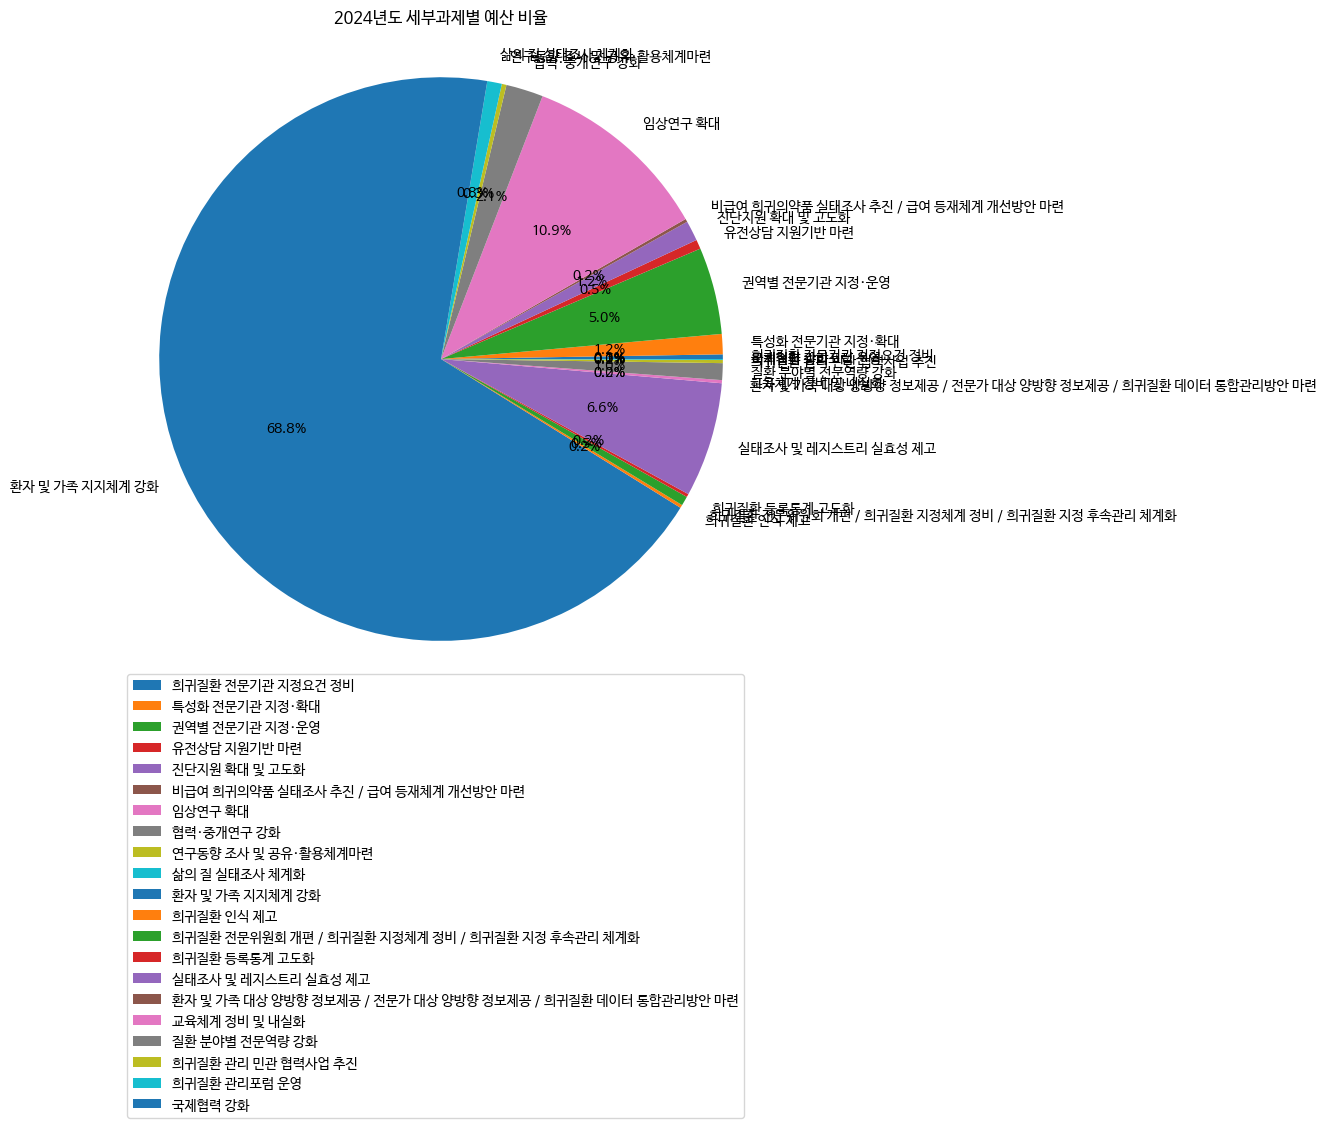

In [16]:
# 2024년도 세부과제 파이차트
plt.figure(figsize=(8, 8))
pie = plt.pie(df_total_list['2024'], labels=df_total_list['세부과제'], autopct='%1.1f%%')
plt.legend(pie[0], df_total_list['세부과제'], bbox_to_anchor=(1.0, 0.0))
plt.axis('equal')
plt.title('2024년도 세부과제별 예산 비율\n')
plt.show()

In [12]:
# 2024년만 추출
df_detail_2024 = df_total_list[['세부과제', '2024']]
df_detail_2024

,세부과제,2024
0,희귀질환 전문기관 지정요건 정비,1.5
1,특성화 전문기관 지정·확대,6.5
2,권역별 전문기관 지정·운영,28.0
3,유전상담 지원기반 마련,3.0
4,진단지원 확대 및 고도화,6.5
5,비급여 희귀의약품 실태조사 추진 / 급여 등재체계 개선방안 마련,1.0
6,임상연구 확대,61.0
7,협력·중개연구 강화,12.0
8,연구동향 조사 및 공유·활용체계마련,1.5
9,삶의 질 실태조사 체계화,4.7


In [13]:
# column 이름 변경
df_detail_2024 = df_detail_2024.rename(columns={'2024': '2024(단위: 억원)'})
df_detail_2024

,세부과제,2024(단위: 억원)
0,희귀질환 전문기관 지정요건 정비,1.5
1,특성화 전문기관 지정·확대,6.5
2,권역별 전문기관 지정·운영,28.0
3,유전상담 지원기반 마련,3.0
4,진단지원 확대 및 고도화,6.5
5,비급여 희귀의약품 실태조사 추진 / 급여 등재체계 개선방안 마련,1.0
6,임상연구 확대,61.0
7,협력·중개연구 강화,12.0
8,연구동향 조사 및 공유·활용체계마련,1.5
9,삶의 질 실태조사 체계화,4.7


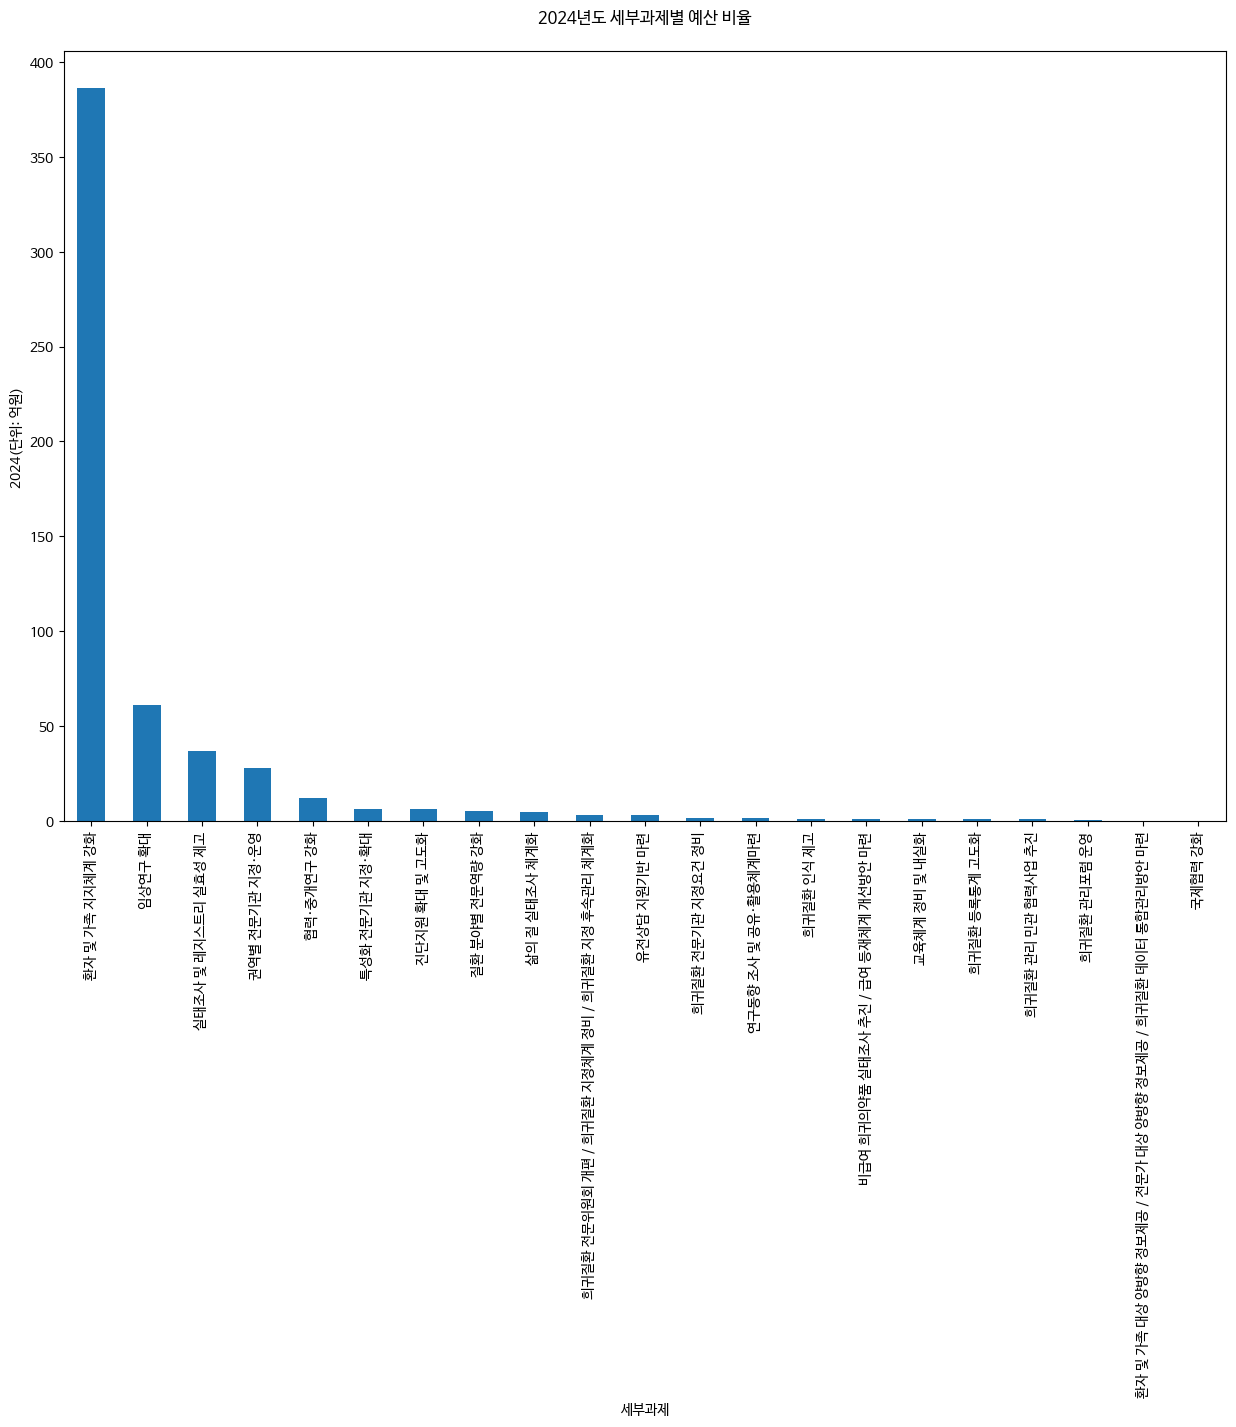

In [20]:
# 데이터프레임을 막대의 길이에 따라 내림차순으로 정렬
df_detail_2024 = df_detail_2024.sort_values(by='2024(단위: 억원)', ascending=False)

# 막대 그래프 그리기 (로그 스케일 적용 이전)
df_detail_2024.plot.bar(x='세부과제', y='2024(단위: 억원)', figsize=(15, 10), legend=None)
plt.title('2024년도 세부과제별 예산 비율\n')
plt.xlabel('세부과제')
plt.ylabel('2024(단위: 억원)')
plt.show()

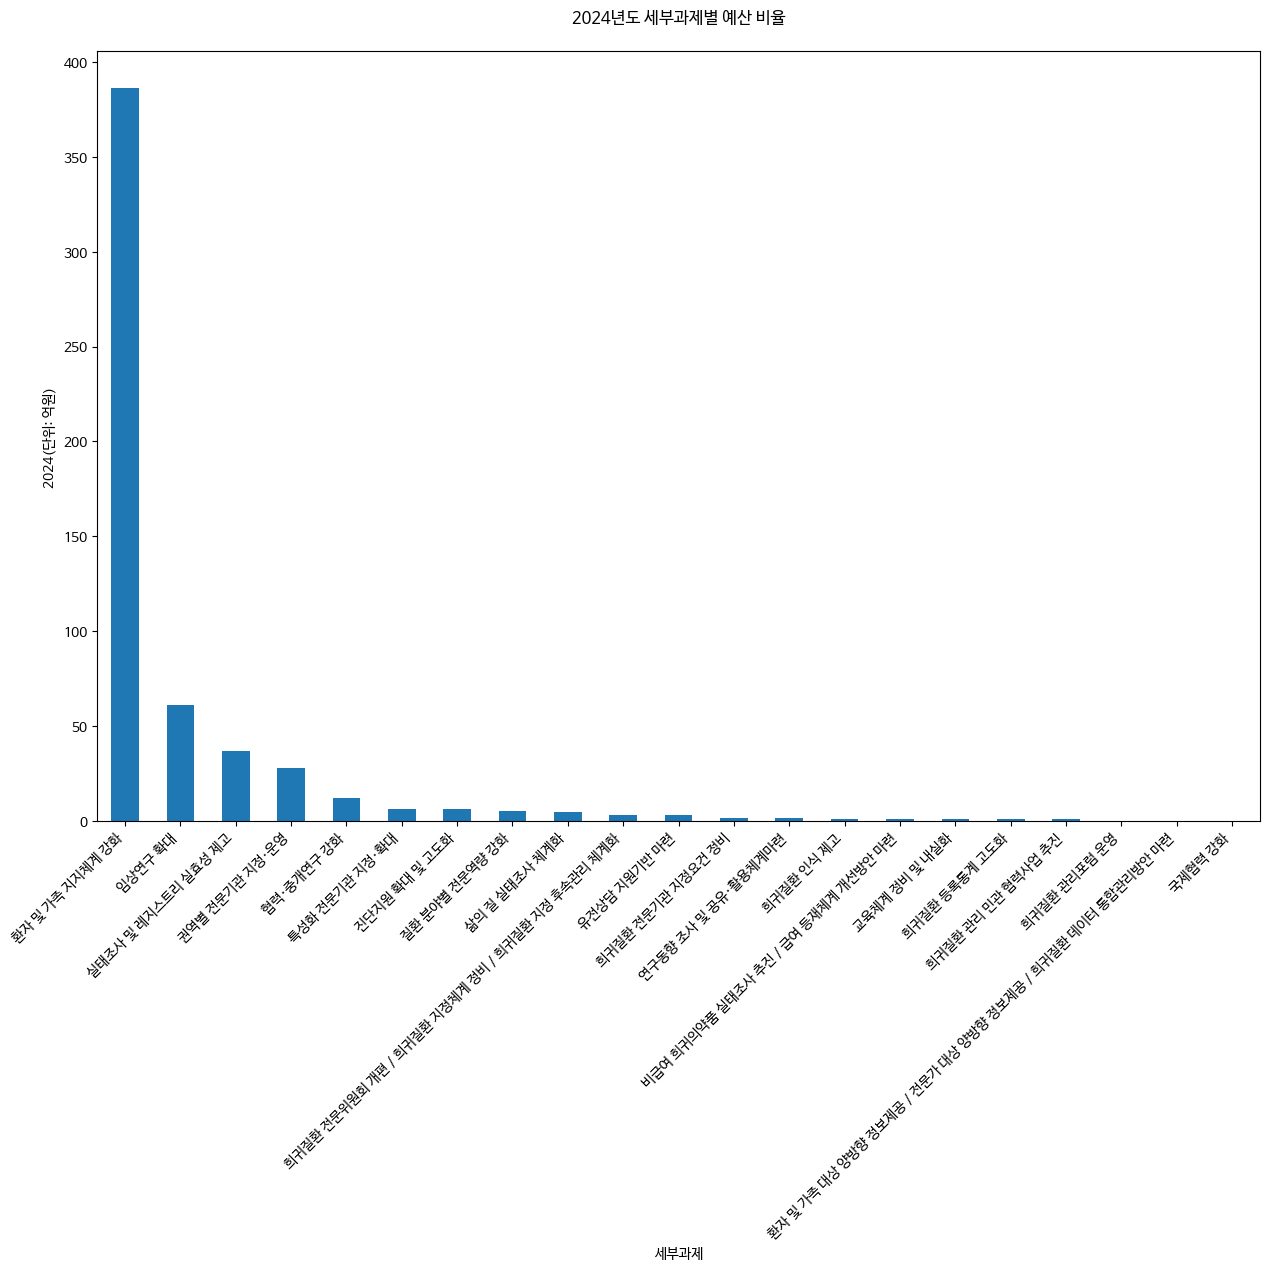

In [24]:
# 데이터프레임을 막대의 길이에 따라 내림차순으로 정렬
df_detail_2024 = df_detail_2024.sort_values(by='2024(단위: 억원)', ascending=False)

# 막대 그래프 그리기
ax = df_detail_2024.plot.bar(x='세부과제', y='2024(단위: 억원)', figsize=(15, 10), legend=None)
plt.title('2024년도 세부과제별 예산 비율\n')
plt.xlabel('세부과제')
plt.ylabel('2024(단위: 억원)')

# x축 라벨 줄 바꿈
plt.xticks(rotation=45, ha='right')  # x축 라벨을 45도 회전하고 우측 정렬하여 표시

plt.show()

In [28]:
import textwrap

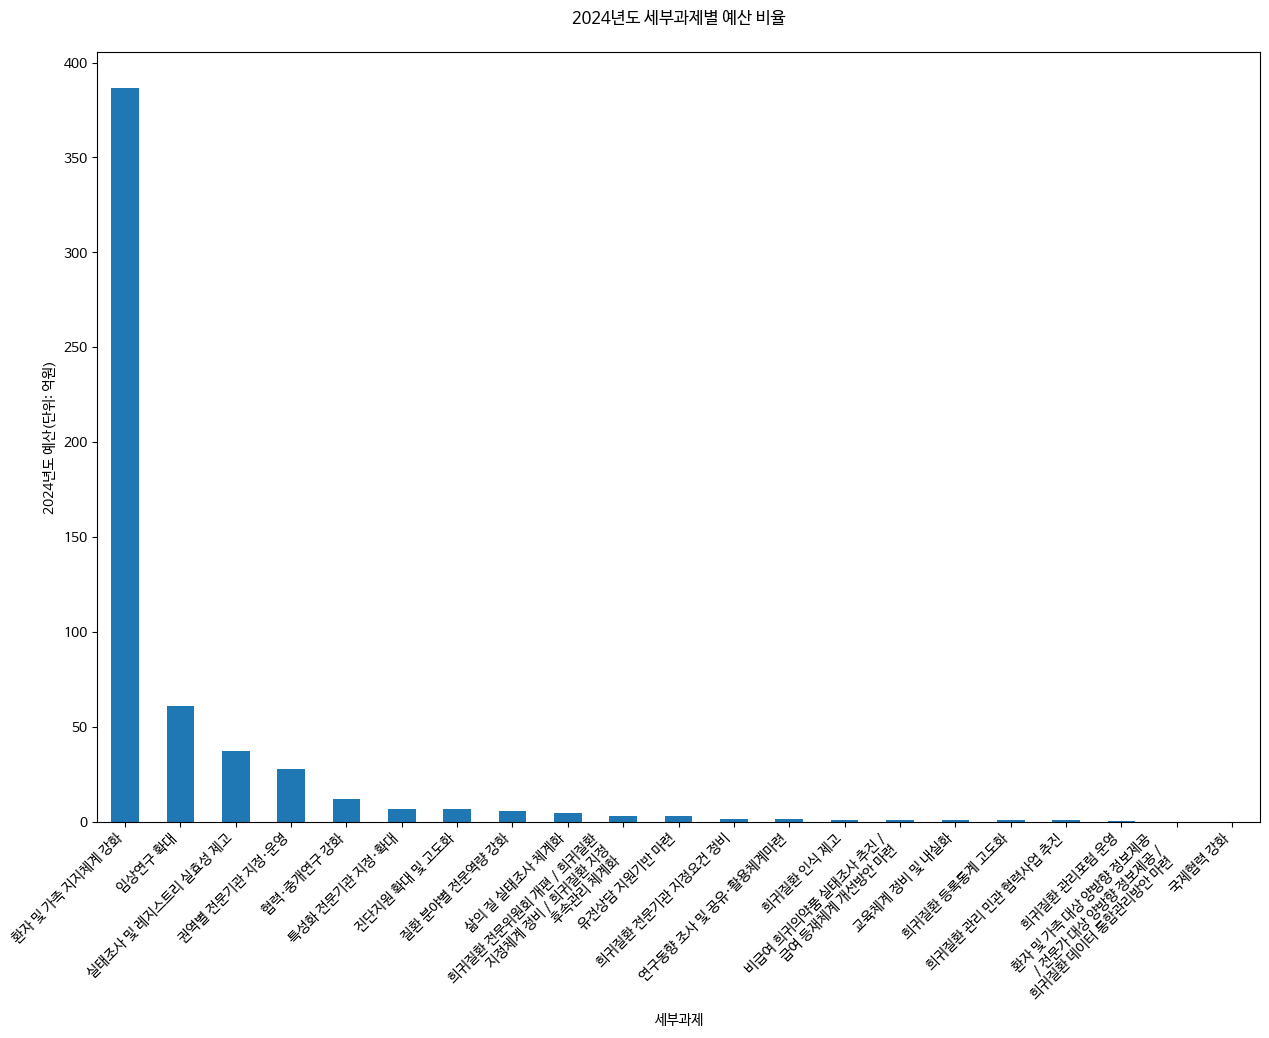

In [31]:
# 데이터프레임을 막대의 길이에 따라 내림차순으로 정렬
df_detail_2024 = df_detail_2024.sort_values(by='2024(단위: 억원)', ascending=False)

# 막대 그래프 그리기
ax = df_detail_2024.plot.bar(x='세부과제', y='2024(단위: 억원)', figsize=(15, 10), legend=None)
plt.title('2024년도 세부과제별 예산 비율\n')
plt.xlabel('세부과제')
plt.ylabel('2024년도 예산(단위: 억원)')

# x축 라벨 줄 바꿈
plt.xticks(rotation=45, ha='right')  # x축 라벨을 45도 회전하고 우측 정렬하여 표시
labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in df_detail_2024['세부과제'] ]  # 라벨을 20글자 단위로 잘라서 줄 바꿈
ax.set_xticklabels(labels)

plt.show()

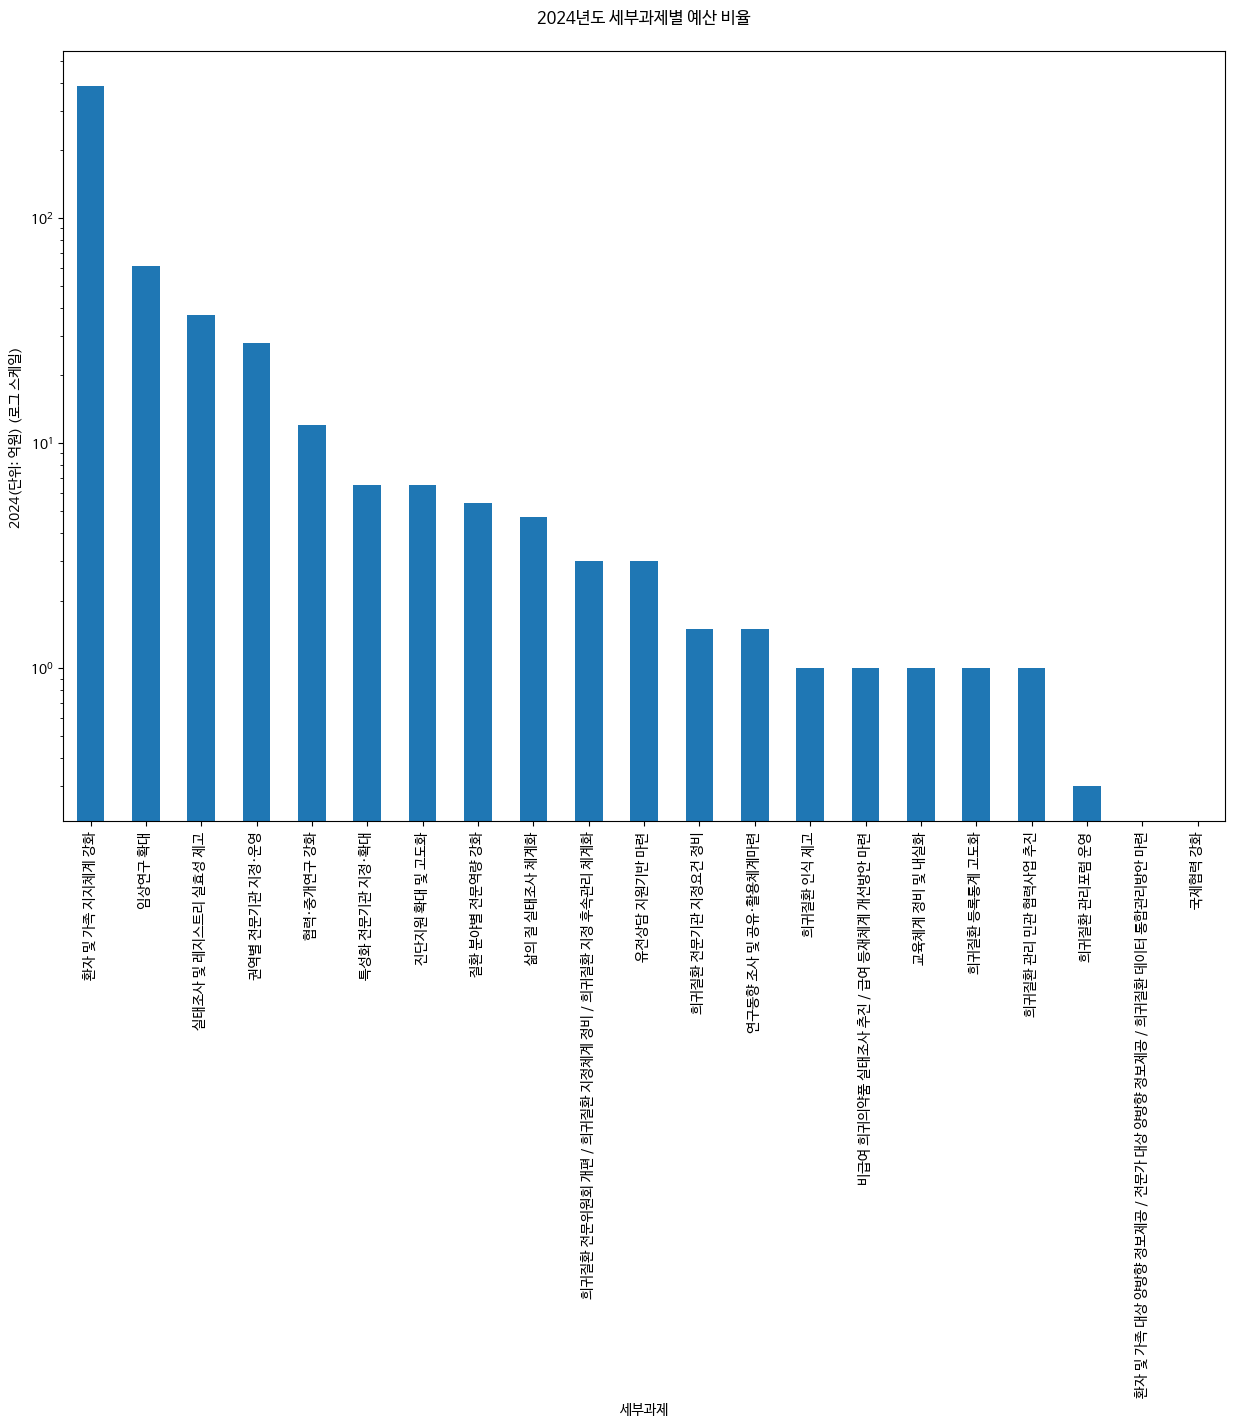

In [23]:
# 데이터프레임을 막대의 길이에 따라 내림차순으로 정렬
df_detail_2024 = df_detail_2024.sort_values(by='2024(단위: 억원)', ascending=False)

# 막대 그래프 그리기 (로그 스케일 적용)
ax = df_detail_2024.plot.bar(x='세부과제', y='2024(단위: 억원)', figsize=(15, 10), legend=None)
plt.yscale('log')  # y축에 로그 스케일 적용
plt.title('2024년도 세부과제별 예산 비율\n')
plt.xlabel('세부과제')
plt.ylabel('2024(단위: 억원) (로그 스케일)')
plt.show()

In [36]:
# 새로운 데이터프레임 형성
project_list = {
    '년도': [2022, 2020, 2019, 2019, 2018, 2018, 2017, 2017, 2015, 2012, 2012, 2008, 2006, 2006, 2006
            ],
    '세부과제': ['제2차 희귀질환관리 종합계획 발표',
             '국가바이오통합빅데이터구축 시범사업 추진 : 희귀질환 2만명 목표',
             '중앙지원-권역거점 센터 체계 마련', '권역센터 확대(4개→11개)',
             '국가관리대상 희귀질환 지정 : 926개(2020년말 1,078개)', '산정특례 적용 및 저소득층 의료비지원사업 운영',
             '제1차 희귀질환관리 종합계획 발표', '극희귀질환자 의료비 부담 완화책 추진',
             '희귀질환관리법 제정(2015.12.29) : 종합적 규정화(2016.12.30. 시행)',
             '임상연구 네트워크 사업 개시 : 다빈도 희귀질환에 대한 임상정보, 유전체정보 및 시료 수집', '연구자와의 정보 공유 등 조기진단 및 치료 향상에 기여',
             '희귀질환 정보 421개 질환으로 확대·제공 : 스터지-베버 증후군 등 200개 신규질환 추가',
             '희귀난치성 질환센터 정보체계 구축사업', '국립보건연구원 희귀난치성질환센터에서 국민건강증진기금 7.5억원을 배정받아 희귀난치성질환자를 위한 정보체계구축사업 시작',
             '헬프라인 구축, 희귀난치성질환 역학조사, 지역거점병원 네트워크 구성, 희귀난치성질환 연구사업 등 수행'
             ]
}

# 데이터프레임 생성
df_project_list = pd.DataFrame(project_list)
df_project_list

# # 2022부터 2026까지의 년도 열과 '계' 열 추가
# years = ['2022', '2023', '2024', '2025', '2026']
# for year in years:
#     df_project_list[year] = project_list[year]

# df_project_list['계(단위: 억원)'] = project_list['계(단위: 억원)']

,년도,세부과제
0,2022,제2차 희귀질환관리 종합계획 발표
1,2020,국가바이오통합빅데이터구축 시범사업 추진 : 희귀질환 2만명 목표
2,2019,중앙지원-권역거점 센터 체계 마련
3,2019,권역센터 확대(4개→11개)
4,2018,"국가관리대상 희귀질환 지정 : 926개(2020년말 1,078개)"
5,2018,산정특례 적용 및 저소득층 의료비지원사업 운영
6,2017,제1차 희귀질환관리 종합계획 발표
7,2017,극희귀질환자 의료비 부담 완화책 추진
8,2015,희귀질환관리법 제정(2015.12.29) : 종합적 규정화(2016.12.30. 시행)
9,2012,"임상연구 네트워크 사업 개시 : 다빈도 희귀질환에 대한 임상정보, 유전체정보 및 시..."


In [39]:
for index, row in df_project_list.iterrows():
    print(f"년도: {row['년도']}, 세부과제: {row['세부과제']}")

년도: 2022, 세부과제: 제2차 희귀질환관리 종합계획 발표
년도: 2020, 세부과제: 국가바이오통합빅데이터구축 시범사업 추진 : 희귀질환 2만명 목표
년도: 2019, 세부과제: 중앙지원-권역거점 센터 체계 마련
년도: 2019, 세부과제: 권역센터 확대(4개→11개)
년도: 2018, 세부과제: 국가관리대상 희귀질환 지정 : 926개(2020년말 1,078개)
년도: 2018, 세부과제: 산정특례 적용 및 저소득층 의료비지원사업 운영
년도: 2017, 세부과제: 제1차 희귀질환관리 종합계획 발표
년도: 2017, 세부과제: 극희귀질환자 의료비 부담 완화책 추진
년도: 2015, 세부과제: 희귀질환관리법 제정(2015.12.29) : 종합적 규정화(2016.12.30. 시행)
년도: 2012, 세부과제: 임상연구 네트워크 사업 개시 : 다빈도 희귀질환에 대한 임상정보, 유전체정보 및 시료 수집
년도: 2012, 세부과제: 연구자와의 정보 공유 등 조기진단 및 치료 향상에 기여
년도: 2008, 세부과제: 희귀질환 정보 421개 질환으로 확대·제공 : 스터지-베버 증후군 등 200개 신규질환 추가
년도: 2006, 세부과제: 희귀난치성 질환센터 정보체계 구축사업
년도: 2006, 세부과제: 국립보건연구원 희귀난치성질환센터에서 국민건강증진기금 7.5억원을 배정받아 희귀난치성질환자를 위한 정보체계구축사업 시작
년도: 2006, 세부과제: 헬프라인 구축, 희귀난치성질환 역학조사, 지역거점병원 네트워크 구성, 희귀난치성질환 연구사업 등 수행


In [40]:
pd.set_option('display.max_colwidth', None)
print(df_project_list)

      년도                                                               세부과제
0   2022                                                 제2차 희귀질환관리 종합계획 발표
1   2020                                국가바이오통합빅데이터구축 시범사업 추진 : 희귀질환 2만명 목표
2   2019                                                 중앙지원-권역거점 센터 체계 마련
3   2019                                                    권역센터 확대(4개→11개)
4   2018                               국가관리대상 희귀질환 지정 : 926개(2020년말 1,078개)
5   2018                                          산정특례 적용 및 저소득층 의료비지원사업 운영
6   2017                                                 제1차 희귀질환관리 종합계획 발표
7   2017                                               극희귀질환자 의료비 부담 완화책 추진
8   2015                   희귀질환관리법 제정(2015.12.29) : 종합적 규정화(2016.12.30. 시행)
9   2012                 임상연구 네트워크 사업 개시 : 다빈도 희귀질환에 대한 임상정보, 유전체정보 및 시료 수집
10  2012                                     연구자와의 정보 공유 등 조기진단 및 치료 향상에 기여
11  2008                희귀질환 정보 421개 질환으로 확대·제공 : 스터지-베버 증후군 등 200개 신규질환 추가
12  2006    